In [123]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os, shutil
import warnings
import random
import cv2
print("Número de GPUs Disponibles: ", len(tf.config.list_physical_devices('GPU')))
warnings.filterwarnings('ignore')

Número de GPUs Disponibles:  1


In [124]:
train_path = 'FloresNativas-sin-modificaciones/train'
validation_path = 'FloresNativas-sin-modificaciones/valid'
test_path = 'FloresNativas-sin-modificaciones/test'
train_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/train/Ananuca/'))
train_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/train/Azulillo/'))
train_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/train/Chagual/'))
train_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/train/Chilco/'))
train_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/train/Copihue/'))
validation_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/valid/Ananuca/'))
validation_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/valid/Azulillo/'))
validation_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chagual/'))
validation_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chilco/'))
validation_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/valid/Copihue/'))
test_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/test/Ananuca/'))
test_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/test/Azulillo/'))
test_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/test/Chagual/'))
test_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/test/Chilco/'))
test_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/test/Copihue/'))
image_categories = os.listdir('FloresNativas-sin-modificaciones/train')

print("NÚMERO TOTAL DE IMÁGENES A UTILIZAR : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue +
test_path_ananuca + test_path_azulillo + test_path_chagual + test_path_chilco + test_path_copihue + validation_path_ananuca + validation_path_azulillo + 
validation_path_chagual + validation_path_chilco + validation_path_copihue ))
print('-----------------------------------------------------')
print("SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Entrenamiento  : {}".format(train_path_ananuca))
print("Set de imágenes de Azulillo para Entrenamiento : {}".format(train_path_azulillo))
print("Set de imágenes de Chagual para Entrenamiento  : {}".format(train_path_chagual))
print("Set de imágenes de Chilco para Entrenamiento   : {}".format(train_path_chilco))
print("Set de imágenes de Copihue para Entrenamiento  : {}".format(train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Validación  : {}".format(validation_path_ananuca))
print("Set de imágenes de Azulillo para Validación : {}".format(validation_path_azulillo))
print("Set de imágenes de Chagual para Validación  : {}".format(validation_path_chagual))
print("Set de imágenes de Chilco para Validación   : {}".format(validation_path_chilco))
print("Set de imágenes de Copihue para Validación  : {}".format(validation_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Testing  : {}".format(test_path_ananuca))
print("Set de imágenes de Azulillo para Testing : {}".format(test_path_azulillo))
print("Set de imágenes de Chagual para Testing  : {}".format(test_path_chagual))
print("Set de imágenes de Chilco para Testing   : {}".format(test_path_chilco))
print("Set de imágenes de Copihue para Testing  : {}".format(test_path_copihue))
print('-----------------------------------------------------')


NÚMERO TOTAL DE IMÁGENES A UTILIZAR : 2750
-----------------------------------------------------
SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : 1925
-----------------------------------------------------
Set de imágenes de Añañuca para Entrenamiento  : 372
Set de imágenes de Azulillo para Entrenamiento : 393
Set de imágenes de Chagual para Entrenamiento  : 390
Set de imágenes de Chilco para Entrenamiento   : 394
Set de imágenes de Copihue para Entrenamiento  : 376
-----------------------------------------------------
Set de imágenes de Añañuca para Validación  : 115
Set de imágenes de Azulillo para Validación : 104
Set de imágenes de Chagual para Validación  : 104
Set de imágenes de Chilco para Validación   : 113
Set de imágenes de Copihue para Validación  : 114
-----------------------------------------------------
Set de imágenes de Añañuca para Testing  : 63
Set de imágenes de Azulillo para Testing : 53
Set de imágenes de Chagual para Testing  : 56
Set de imágenes de Chilco para Testing

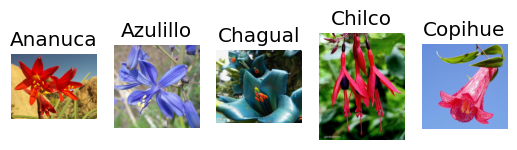

In [125]:
def plot_images(image_categories):

 # Create a figure
 plt.figure(figsize=(10, 10))
for i, cat in enumerate(image_categories):

 # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0


 # Create Subplot and plot the images
    plt.subplot(1, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()


In [126]:
#MOSTRAR EJEMPLOS DE CADA CLASE

In [127]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_set = train_gen.flow_from_directory(
 train_path,
 target_size=(150, 150),
 batch_size=40,
 class_mode='categorical')


Found 1925 images belonging to 5 classes.


In [128]:
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_set = train_gen.flow_from_directory(
 validation_path,
 target_size=(150, 150),
 batch_size=40,
 class_mode='categorical')

Found 550 images belonging to 5 classes.


In [129]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_set = train_gen.flow_from_directory(
 test_path,
 target_size=(150, 150),
 batch_size=275,
 class_mode='categorical')

Found 275 images belonging to 5 classes.


In [130]:
class_map = dict([(v, k) for k, v in train_set.class_indices.items()])
print(class_map)

{0: 'Ananuca', 1: 'Azulillo', 2: 'Chagual', 3: 'Chilco', 4: 'Copihue'}


# MODELO DESDE CERO 

#### Se carga la clase para generar los modelos secuenciales

In [131]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

#### Se cargan las siguientes capas

In [132]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

In [133]:
#antes habían dos capas convolucionales 32, 64 kernel size = 3
model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

In [134]:
model.add(Flatten())

In [135]:
model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [136]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 18, 18, 128)    

In [137]:
# early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
cero_history = model.fit(train_set,
                 epochs=40,
                 verbose=1, 
                 validation_data=val_set,
                 )

Epoch 1/40
49/49 [==============================] - 6s 116ms/step - loss: 1.1408 - accuracy: 0.4816 - val_loss: 0.7175 - val_accuracy: 0.6691
Epoch 2/40
49/49 [==============================] - 6s 115ms/step - loss: 0.7187 - accuracy: 0.6717 - val_loss: 0.5900 - val_accuracy: 0.7273
Epoch 3/40
49/49 [==============================] - 6s 113ms/step - loss: 0.5792 - accuracy: 0.7408 - val_loss: 0.5565 - val_accuracy: 0.7800
Epoch 4/40
49/49 [==============================] - 6s 127ms/step - loss: 0.5098 - accuracy: 0.7865 - val_loss: 0.4124 - val_accuracy: 0.8491
Epoch 5/40
49/49 [==============================] - 6s 117ms/step - loss: 0.3219 - accuracy: 0.8816 - val_loss: 0.2937 - val_accuracy: 0.8945
Epoch 6/40
49/49 [==============================] - 5s 110ms/step - loss: 0.2363 - accuracy: 0.9153 - val_loss: 0.2630 - val_accuracy: 0.9291
Epoch 7/40
49/49 [==============================] - 5s 109ms/step - loss: 0.3805 - accuracy: 0.8961 - val_loss: 0.4009 - val_accuracy: 0.8745
Epoch 

In [138]:
# cero_history = model.fit(train_set,epochs=5,validation_data=val_set)

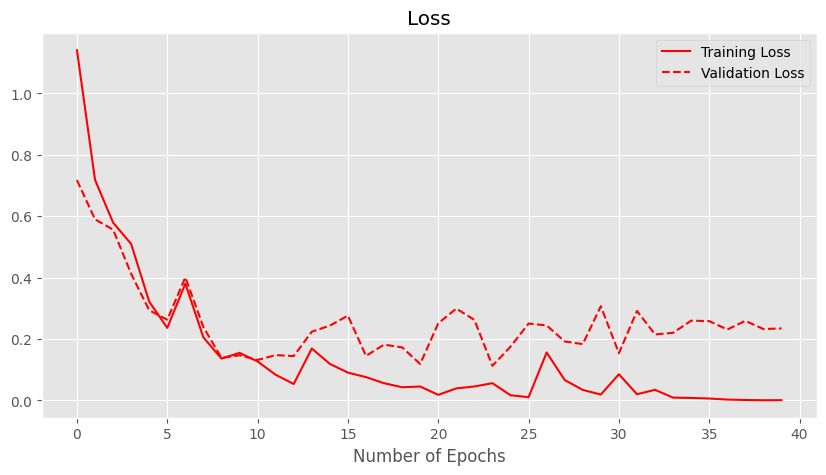

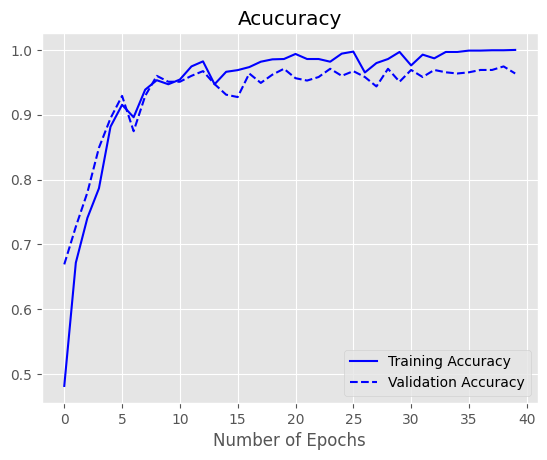

In [139]:
h = cero_history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.title ('Loss')
plt.legend(loc='best')
plt.show()

plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.title ('Acucuracy')
plt.legend(loc='best')
plt.show()

#### Predecir la precisión para el set de testeo

In [140]:
cero_auc = model.evaluate(test_set)

1/1 [==============================] - 1s 961ms/step - loss: 0.0606 - accuracy: 0.9855


In [141]:
# test_pred = model.predict(test_set)
# test_pred = np.argmax(test_pred,axis = 1)
# test_labels = test_set.labels

# plt.figure(figsize=(12, 6))
# ax = sns.heatmap(tf.math.confusion_matrix(
#  test_labels,
#  test_pred,
#  num_classes=None,
#  weights=None,
#  dtype=tf.dtypes.int32,
#  name=None,
# ),annot = True,
#  fmt="d")
# ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
# ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

# ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
# ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
# ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [142]:
# from sklearn.metrics import confusion_matrix, classification_report
# print (classification_report(test_labels, test_pred))

#### Testear el Modelo

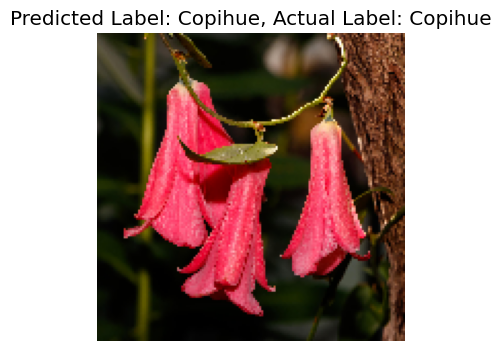

In [143]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Copihue/Lapageria_rosea_-_Wilhelma_01_jpg.rf.0eea21e623f68728df33213ef52a6642.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #Cargar y preprocesar la imagen
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Realizar las predicciones
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_flower = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_flower, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Llamar a la función
generate_predictions(test_image_path, actual_label='Copihue')  # PROBAR CON TODAS LAS CLASES!!! 

# MODELO ResNet-50

In [144]:
from tensorflow.keras.applications.resnet import ResNet50

resnet = ResNet50(include_top=False,
        weights='imagenet',
        input_shape=(150,150,3))
for layer in resnet.layers:
    layer.trainable = False
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics = ['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_11 (Flatten)        (None, 51200)             0         
                                                                 
 dense_29 (Dense)            (None, 5)                 256005    
                                                                 
Total params: 23,843,717
Trainable params: 256,005
Non-trainable params: 23,587,712
_________________________________________________________________


In [145]:
resnet50_history = model.fit(train_set,epochs=40,validation_data=val_set)

Epoch 1/40
49/49 [==============================] - 11s 174ms/step - loss: 1.6207 - accuracy: 0.3408 - val_loss: 1.3649 - val_accuracy: 0.4455
Epoch 2/40
49/49 [==============================] - 7s 137ms/step - loss: 1.3439 - accuracy: 0.4582 - val_loss: 1.3117 - val_accuracy: 0.4455
Epoch 3/40
49/49 [==============================] - 7s 134ms/step - loss: 1.2552 - accuracy: 0.4930 - val_loss: 1.3635 - val_accuracy: 0.4236
Epoch 4/40
49/49 [==============================] - 7s 135ms/step - loss: 1.1540 - accuracy: 0.5465 - val_loss: 1.2443 - val_accuracy: 0.4491
Epoch 5/40
49/49 [==============================] - 7s 134ms/step - loss: 1.1032 - accuracy: 0.5652 - val_loss: 1.4189 - val_accuracy: 0.4218
Epoch 6/40
49/49 [==============================] - 7s 136ms/step - loss: 1.1063 - accuracy: 0.5787 - val_loss: 1.0330 - val_accuracy: 0.6036
Epoch 7/40
49/49 [==============================] - 7s 134ms/step - loss: 0.9540 - accuracy: 0.6400 - val_loss: 1.0168 - val_accuracy: 0.6109
Epoch

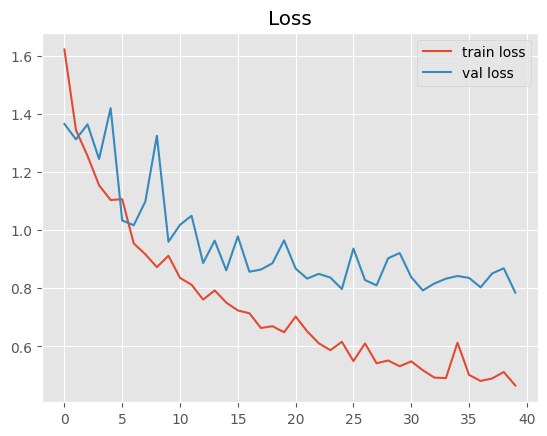

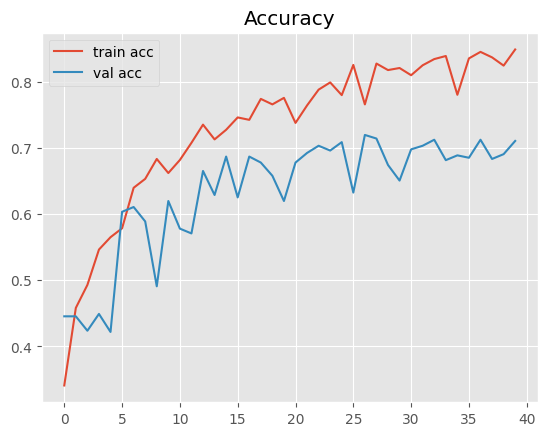

In [146]:
plt.plot(resnet50_history.history['loss'], label='train loss')
plt.plot(resnet50_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


plt.plot(resnet50_history.history['accuracy'], label='train acc')
plt.plot(resnet50_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [147]:
resnet50_auc = model.evaluate(test_set)

1/1 [==============================] - 1s 1s/step - loss: 0.7090 - accuracy: 0.7418


In [148]:
# test_pred = model.predict(test_set)
# test_pred = np.argmax(test_pred,axis = 1)
# test_labels = test_set.labels

# plt.figure(figsize=(12, 6))
# ax = sns.heatmap(tf.math.confusion_matrix(
#  test_labels,
#  test_pred,
#  num_classes=None,
#  weights=None,
#  dtype=tf.dtypes.int32,
#  name=None,
# ),annot = True,
#  fmt="d")
# ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
# ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

# ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
# ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
# ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [149]:
# from sklearn.metrics import confusion_matrix, classification_report
# print (classification_report(test_labels, test_pred))

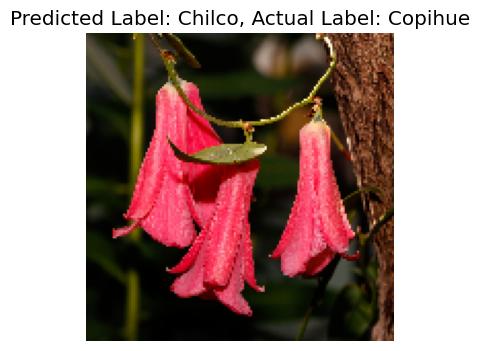

In [150]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Copihue/Lapageria_rosea_-_Wilhelma_01_jpg.rf.0eea21e623f68728df33213ef52a6642.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #Cargar y preprocesar la imagen
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Realizar las predicciones
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_flower = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_flower, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Llamar a la función
generate_predictions(test_image_path, actual_label='Copihue')  # PROBAR CON TODAS LAS CLASES!!! 

# Modelo ResNet-152

In [151]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

In [152]:
from tensorflow.keras.applications.resnet import ResNet152

resnet = ResNet152(include_top=False,
        weights='imagenet',
        input_shape=(150,150,3))
for layer in resnet.layers:
    layer.trainable = False
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics = ['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 5, 5, 2048)        58370944  
                                                                 
 flatten_12 (Flatten)        (None, 51200)             0         
                                                                 
 dense_30 (Dense)            (None, 5)                 256005    
                                                                 
Total params: 58,626,949
Trainable params: 256,005
Non-trainable params: 58,370,944
_________________________________________________________________


In [153]:
resnet152_history = model.fit(train_set,epochs=40,validation_data=val_set)

Epoch 1/40
49/49 [==============================] - 25s 353ms/step - loss: 2.0214 - accuracy: 0.2982 - val_loss: 1.5596 - val_accuracy: 0.3345
Epoch 2/40
49/49 [==============================] - 15s 301ms/step - loss: 1.3056 - accuracy: 0.4556 - val_loss: 1.2575 - val_accuracy: 0.5109
Epoch 3/40
49/49 [==============================] - 15s 301ms/step - loss: 1.2201 - accuracy: 0.5112 - val_loss: 1.4448 - val_accuracy: 0.4036
Epoch 4/40
49/49 [==============================] - 15s 301ms/step - loss: 1.0951 - accuracy: 0.5616 - val_loss: 1.1844 - val_accuracy: 0.5582
Epoch 5/40
49/49 [==============================] - 15s 302ms/step - loss: 1.0935 - accuracy: 0.5787 - val_loss: 1.1645 - val_accuracy: 0.5145
Epoch 6/40
49/49 [==============================] - 15s 302ms/step - loss: 0.9425 - accuracy: 0.6488 - val_loss: 1.0856 - val_accuracy: 0.6073
Epoch 7/40
49/49 [==============================] - 15s 302ms/step - loss: 0.9312 - accuracy: 0.6374 - val_loss: 1.0952 - val_accuracy: 0.6000

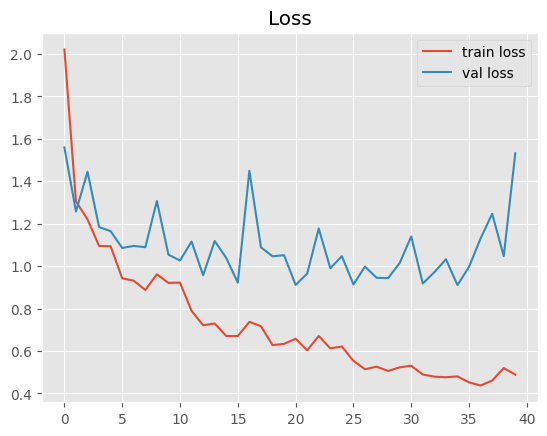

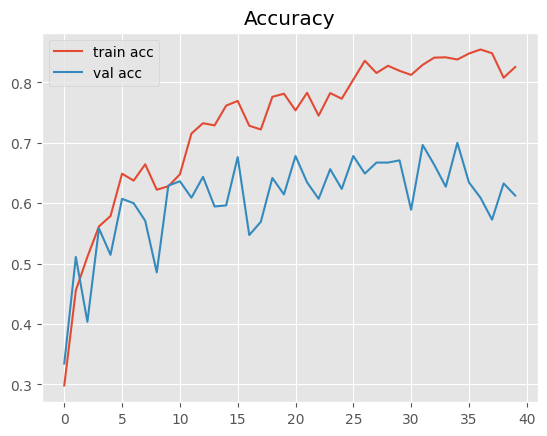

In [154]:
plt.plot(resnet152_history.history['loss'], label='train loss')
plt.plot(resnet152_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


plt.plot(resnet152_history.history['accuracy'], label='train acc')
plt.plot(resnet152_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [155]:
resnet152_auc = model.evaluate(test_set)

1/1 [==============================] - 2s 2s/step - loss: 1.2466 - accuracy: 0.6655


In [156]:
# test_pred = model.predict(test_set)
# test_pred = np.argmax(test_pred,axis = 1)
# test_labels = test_set.labels

# plt.figure(figsize=(12, 6))
# ax = sns.heatmap(tf.math.confusion_matrix(
#  test_labels,
#  test_pred,
#  num_classes=None,
#  weights=None,
#  dtype=tf.dtypes.int32,
#  name=None,
# ),annot = True,
#  fmt="d")
# ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
# ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

# ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
# ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
# ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [157]:
# from sklearn.metrics import confusion_matrix, classification_report
# print (classification_report(test_labels, test_pred))

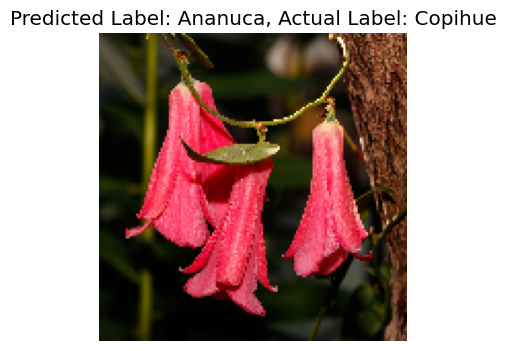

In [158]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Copihue/Lapageria_rosea_-_Wilhelma_01_jpg.rf.0eea21e623f68728df33213ef52a6642.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #Cargar y preprocesar la imagen
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Realizar las predicciones
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_flower = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_flower, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Llamar a la función
generate_predictions(test_image_path, actual_label='Copihue')  # PROBAR CON TODAS LAS CLASES!!! 

# MODELO SVM 

In [159]:
# import numpy as np
# import cv2
# import glob
# import os
# import matplotlib.pyplot as plt
# import string
# import mlxtend
# from mlxtend.plotting import plot_decision_regions
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.utils.multiclass import unique_labels
# from sklearn import metrics
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets

In [160]:
# def getFlowers(flowers, data_type, print_n=False, k_fold=False):
#     images = []
#     labels = []
#     val = ['train', 'test']
#     if not k_fold:
#         path = "./FloresNativas-sin-modificaciones/" + data_type + "/"
#         for i,f in enumerate(flowers):
#             p = path + f
#             j=0
#             for image_path in glob.glob(os.path.join(p, "*.jpg")):
#                 image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#                 image = cv2.resize(image, (150, 150))
#                 image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#                 images.append(image)
#                 labels.append(i)
#                 j+=1
#             if(print_n):
#                 print("Existen " , j , " imágenes de  " , data_type.upper(), " de " ,flowers[i].upper())
#         images = np.array(images)
#         labels = np.array(labels)
#         return images, labels
#     else:
#         for v in val:
#             path = "./FloresNativas-sin-modificaciones/" + v + "/"
#             for i,f in enumerate(flowers):
#                 p = path + f
#                 j=0
#                 for image_path in glob.glob(os.path.join(p, "*")):
#                     image = cv2.imread(image_path, cv2.IMREAD_COLOR)
#                     image = cv2.resize(image, (150, 150))
#                     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#                     images.append(image)
#                     labels.append(i)
#                     j+=1
#         images = np.array(images)
#         labels = np.array(labels)
#         return images, labels




In [161]:
# flowers = ['Ananuca', 'Azulillo', 'Chagual', 'Chilco', 'Copihue']

# #Get Images and Labels
# X_t, y_train = getFlowers(flowers, 'train', print_n=True, k_fold=False )
# X_test, y_test = getFlowers(flowers, 'test' , print_n=True, k_fold=False)

# #Get data for k-fold
# X,y = getFlowers(flowers, '', print_n=True, k_fold=True)


# #Scale Data Images
# scaler = StandardScaler()
# X_train = scaler.fit_transform([i.flatten() for i in X_t])
# X_test = scaler.fit_transform([i.flatten() for i in X_test])
# X = scaler.fit_transform([i.flatten() for i in X])


In [162]:
# def getClassNumber(y):
#     v =[]
#     i=0
#     count = 0
#     for index in y:
#         if(index == i):
#             count +=1
#         else:
#             v.append(count)
#             count = 1
#             i +=1
#     v.append(count)        
#     return v

In [163]:
# def plotPrincipalComponents(X, dim):
#     v = getClassNumber(y_train)
#     colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
#     markers = ['o', 'x' , 'v', 'd']
#     tot = len(X)
#     start = 0
#     if(dim == 2):
#         fig = plt.figure(1, figsize=(4, 3))
#         for i,index in enumerate(v):
#             end = start + index
#             plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = flowers[i])
#             start = end
#         plt.xlabel('')
#         plt.ylabel('')
#         plt.title ('SVM en 2D')
   
#     if(dim == 3):
#         fig = plt.figure(1, figsize=(9, 9))
#         ax = fig.add_subplot(111, projection='3d', elev=0, azim= 45)  # azim = rotación eje x, elev= punto de vista eje y
#         for i,index in enumerate(v):
#             end = start + index
#             ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = flowers[i])
#             start = end
#         ax.set_xlabel('x')
#         ax.set_ylabel('y')
#         ax.set_zlabel('z')
#         ax.set_title ('SVM en 3D')


#     plt.legend(loc='lower left')
#     plt.xticks()
#     plt.yticks()
#     plt.show()

In [164]:
# pca = PCA(n_components=3)
# dataIn3D = pca.fit_transform(X_train)
# plotPrincipalComponents(dataIn3D, 3)

In [165]:
# def plot_confusion_matrix(y_true, y_pred, classes,
#                           normalize=False,
#                           title=None,
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = metrics.confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     classes = unique_labels(y_true, y_pred)
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     fig, ax = plt.subplots()
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=flowers, yticklabels=flowers,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
#     return cm,ax

In [166]:
# pca = PCA(n_components=2)
# plt.figure(1, figsize=(8, 6))
# dataIn2D = pca.fit_transform(X_train)
# plotPrincipalComponents(dataIn2D, 2)

In [167]:



# pca = PCA(n_components=3)
# dataIn3D = pca.fit_transform(X_train)
# plotPrincipalComponents(dataIn3D, 3)



In [168]:
# kernel = linear, rbf , polynomial, sigmoid, cambiar C y Gamma  C=0.1,

# svm = SVC(gamma='auto', kernel='poly',  probability=True)  
# svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)

# #Evaluation
# precision = metrics.accuracy_score(y_pred, y_test) * 100
# print("Accuracy with SVM: {0:.4f}%".format(precision))
# cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train,
# normalize=True, title='Normalized confusion matrix')
# plt.show()

In [169]:
# pred_kfold = cross_val_score(svm, X, y, cv=5)
# print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

In [170]:
# pca = PCA(n_components=2)
# X_train2D = pca.fit_transform(X_train)
# X_test2D = pca.fit_transform(X_test)

# svm.fit(X_train2D, y_train) 
# test_predictions = svm.predict(X_test2D)
# precision = metrics.accuracy_score(test_predictions, y_test) * 100
# print("Precisión con SVM considerando 5 clases primarias: {0:.4f}%".format(precision))

# #Plotting decision boundaries
# plot_decision_regions(X_train2D, y_train, clf=svm, legend=1)
# plt.xlabel('')
# plt.ylabel('')
# plt.title('Límites de decisión SVM RBF')
# plt.show()

In [171]:
# svm_with_kernel = SVC(gamma= 'auto' , kernel='poly',  probability=True)
# svm_with_kernel.fit(X_train2D, y_train) 
# y_pred = svm_with_kernel.predict(X_test2D)
# precision = metrics.accuracy_score(y_pred, y_test) * 100
# print("Accuracy with Not-Linear SVM considering only first 2PC: {0:.4f}%".format(precision))

# #Plotting decision boundaries
# plot_decision_regions(X_train2D, y_train, clf=svm_with_kernel, legend=1)
# plt.xlabel('')
# plt.ylabel('')
# plt.title('Límites de decisión SVM RBF')
# plt.show()

# Modelo Inception V3

In [172]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(include_top=False,
 weights='imagenet',
 input_shape=(150,150,3))
for layer in inception.layers:
     layer.trainable = False
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics = ['accuracy'])


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_13 (Flatten)        (None, 18432)             0         
                                                                 
 dense_31 (Dense)            (None, 5)                 92165     
                                                                 
Total params: 21,894,949
Trainable params: 92,165
Non-trainable params: 21,802,784
_________________________________________________________________


In [173]:
inception_history = model.fit(train_set,epochs=40,validation_data=val_set)

Epoch 1/40
49/49 [==============================] - 13s 175ms/step - loss: 1.3014 - accuracy: 0.7839 - val_loss: 0.4247 - val_accuracy: 0.9164
Epoch 2/40
49/49 [==============================] - 6s 116ms/step - loss: 0.1290 - accuracy: 0.9584 - val_loss: 0.3741 - val_accuracy: 0.9255
Epoch 3/40
49/49 [==============================] - 6s 119ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.3602 - val_accuracy: 0.9218
Epoch 4/40
49/49 [==============================] - 6s 119ms/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.3186 - val_accuracy: 0.9309
Epoch 5/40
49/49 [==============================] - 6s 119ms/step - loss: 0.0089 - accuracy: 0.9995 - val_loss: 0.3380 - val_accuracy: 0.9309
Epoch 6/40
49/49 [==============================] - 6s 119ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3386 - val_accuracy: 0.9273
Epoch 7/40
49/49 [==============================] - 6s 120ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3108 - val_accuracy: 0.9309
Epoch

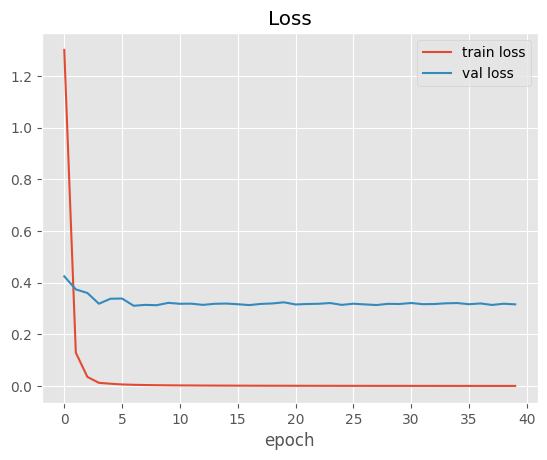

In [174]:


plt.plot(inception_history.history['loss'], label='train loss')
plt.plot(inception_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.xlabel ('epoch')
plt.show()

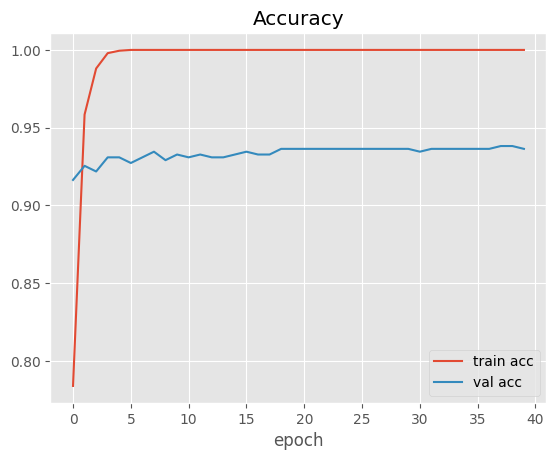

In [175]:
#plt.savefig('LossVal_loss')
plt.plot(inception_history.history['accuracy'], label='train acc')
plt.plot(inception_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.xlabel ('epoch')
plt.show()

In [176]:
inception_auc = model.evaluate(test_set)

1/1 [==============================] - 3s 3s/step - loss: 0.1461 - accuracy: 0.9636


In [177]:
# test_pred = model.predict(test_set)
# test_pred = np.argmax(test_pred,axis = 1)
# test_labels = test_set.labels

# plt.figure(figsize=(12, 6))
# ax = sns.heatmap(tf.math.confusion_matrix(
#  test_labels,
#  test_pred,
#  num_classes=None,
#  weights=None,
#  dtype=tf.dtypes.int32,
#  name=None,
# ),annot = True,
#  fmt="d")
# ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
# ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

# ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
# ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
# ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [178]:
# from sklearn.metrics import confusion_matrix, classification_report
# print (classification_report(test_labels, test_pred))

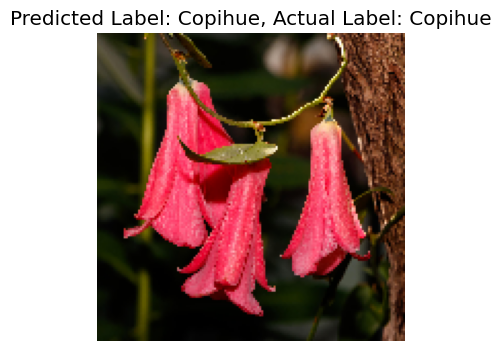

In [179]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Copihue/Lapageria_rosea_-_Wilhelma_01_jpg.rf.0eea21e623f68728df33213ef52a6642.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #Cargar y preprocesar la imagen
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Realizar las predicciones
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_flower = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_flower, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Llamar a la función
generate_predictions(test_image_path, actual_label='Copihue')  # PROBAR CON TODAS LAS CLASES!!! 

# COMPARACIÓN DE LOS MODELOS

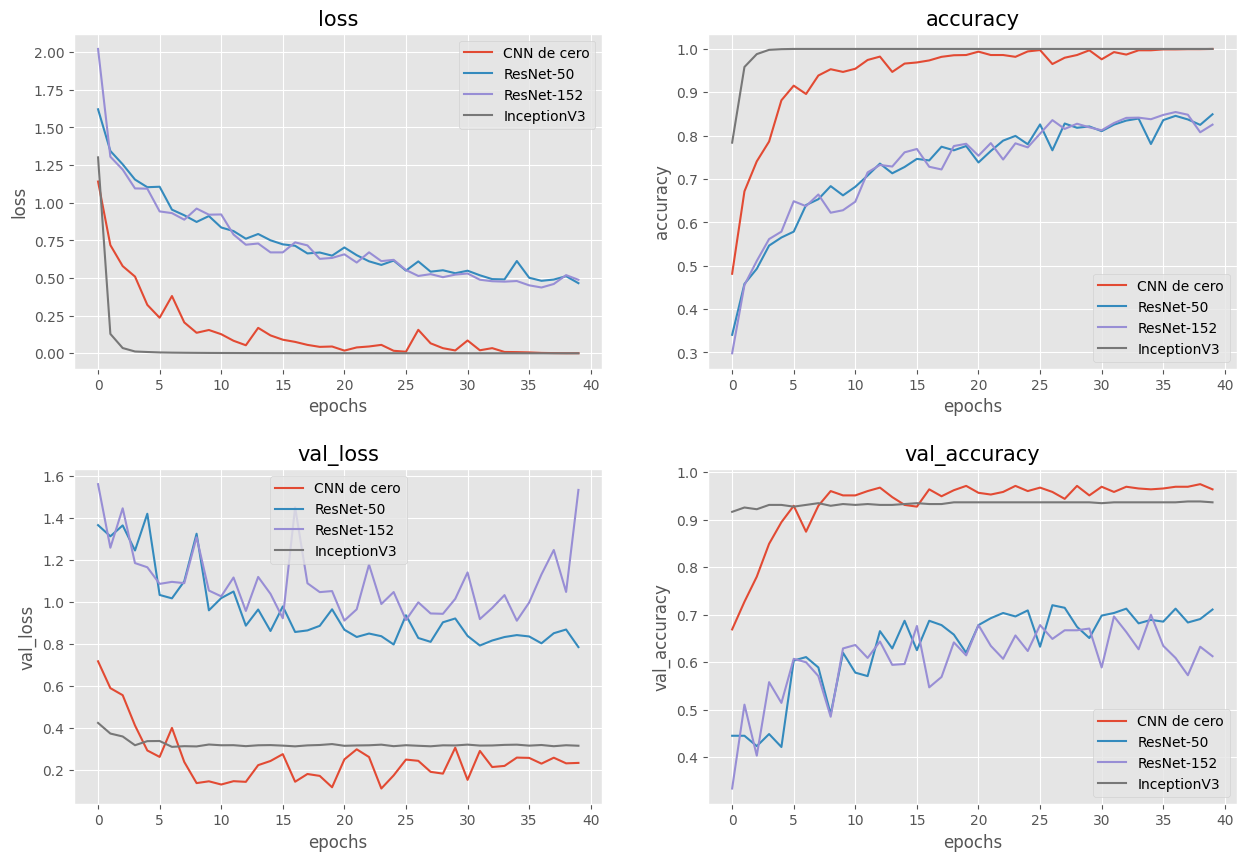

In [180]:
def predict(path):
 img = cv2.imread(path)
 img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 img = cv2.resize(img, (224,224),interpolation=cv2.INTER_NEAREST)
 plt.axis('off')
 plt.imshow(img)
 img = np.expand_dims(img,axis=0)
 predict = model.predict('FloresNativas-sin-modificaciones/test/Chagual/Screenshot_114_png.rf.eb87436ef677fc1ee533e7c5b50003d6.jpg')
 predict = np.argmax(predict,axis = 1)

model_hist = [cero_history, resnet50_history, resnet152_history, inception_history]
names = ['CNN de cero','ResNet-50', 'ResNet-152', 'InceptionV3']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_hist[0].history:
 index = list(model_hist[0].history).index(metric)
 ax = axes.flatten()[index]
 name_index = 0
 for history in model_hist:
    ax.plot(history.history[metric], label=names[name_index])
    name_index += 1
 ax.set_title(metric, size=15)
 ax.set_xlabel('epochs')
 ax.set_ylabel(metric)
 ax.legend()
plt.show()

In [181]:
data={'Nets':[ 'CNN de cero','SVM', 'ResNet-50', 'ResNet-152','InceptionV3' ],
 'Accuracy':[cero_auc[1], 0.396463 ,resnet50_auc[1],resnet152_auc[1], inception_auc[1]]}
df =pd.DataFrame(data)
df.sort_values('Accuracy', ascending=False)

,Nets,Accuracy
0,CNN de cero,0.985455
4,InceptionV3,0.963636
2,ResNet-50,0.741818
3,ResNet-152,0.665455
1,SVM,0.396463
